In [45]:
# Loading in the Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Loading in the Simulation Objects
from src.Centrifugation import *

In [46]:
# Centrifugation parms
time = 10 # (min)
rpm = 4000
arm_length = 10 * 1e-2 # length of centrifuge 10cm  (m)
length = 1 * 1e-2 # tube length 1cm (m)

# Liquid parms
liquid_density = 997 # water (kg/m^2)
liquid_viscosity = 1 # water (mPa.s)

# Particle parms
particle_density = 2330 # silicon (kg.m^2)

In [37]:
# Inital size distribution - uniformed distribution
count = 100
size = np.linspace(1,251,count) * 1e-9
probability = np.ones(count)

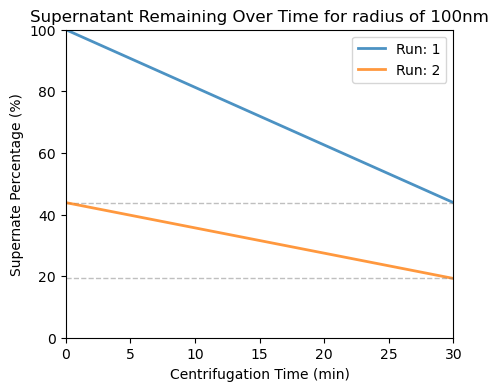

In [47]:
# How does mutiple runs look for a single size particle?
size = 100 * 1e-9
rpm = 4000
runs = 2 

prob = 1

fig, ax = plt.subplots(figsize=(5,4))
for run in range(runs):
    time = np.linspace(0,30,100)
    prob_remaining = cal_remaining_percent(size, prob, time,
                                            particle_density, liquid_density, liquid_viscosity,
                                            rpm, arm_length, length)
    prob = prob_remaining[-1]
    ax.plot(time, prob_remaining * 1e2, label=f"Run: {run +1}", alpha = 0.8, linewidth=2) 

    # Add a gray dotted line at y=prob
    ax.axhline(y=prob * 1e2, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax.set_ylim([0,100])
ax.set_xlim([0,time[-1]])

ax.set_xlabel("Centrifugation Time (min)")
ax.set_ylabel("Supernate Percentage (%)")
ax.set_title(f'Supernatant Remaining Over Time for radius of {size * 1e9:.0f}nm')
ax.legend()


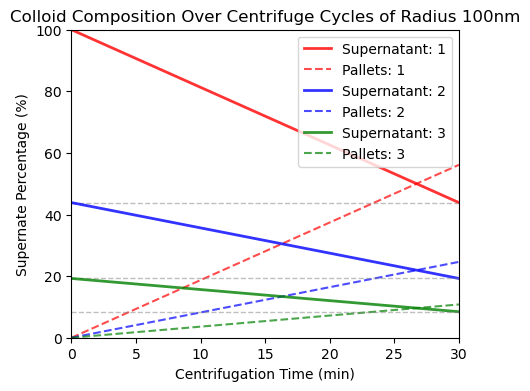

In [49]:
# Pallets and supernatants
size = 100 * 1e-9
rpm = 4000
runs = 3 

prob = 1

# Define a color cycle for different runs
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(5,4))
for run in range(runs):
    time = np.linspace(0,30,100)
    supernate, pallets = cal_supernate_and_pallets(size, prob, time,
                                            particle_density, liquid_density, liquid_viscosity,
                                            rpm, arm_length, length)
    prob = supernate[-1]
    ax.plot(time, supernate * 1e2, label=f"Supernatant: {run +1}", alpha = 0.8, linewidth=2, color=colors[run]) 
    ax.plot(time, pallets * 1e2, label=f"Pallets: {run + 1}", alpha=0.7, linestyle='--', color=colors[run])

    # Add a gray dotted line at y=prob
    ax.axhline(y=prob * 1e2, color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax.set_ylim([0,100])
ax.set_xlim([0,time[-1]])

ax.set_xlabel("Centrifugation Time (min)")
ax.set_ylabel("Supernate Percentage (%)")
ax.set_title(f'Colloid Composition Over Centrifuge Cycles of Radius {size * 1e9:.0f}nm')
ax.legend()


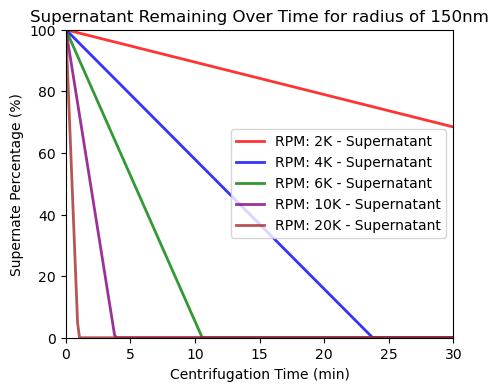

In [44]:
# How does speed effect the change over time
count = 1000
size = 150 * 1e-9
rpm = np.array([2000, 4000, 6000, 10000, 20000])
j = 0

fig, ax = plt.subplots(figsize=(5,4))

colors = ['red', 'blue', 'green', 'purple', 'brown']

for speed in rpm:
    prob = 1
    time = np.linspace(0,30,200)
    prob, pallets = cal_supernate_and_pallets(size, prob, time,
                                          particle_density, liquid_density, liquid_viscosity,
                                         speed, arm_length, length)
    
    
#     ax.plot(time, remaining_percent * 1e2, label=f"RPM: {speed * 1e-3:.0f}K", alpha = 0.8, linewidth=2)
    ax.plot(time, prob * 1e2, label=f"RPM: {speed * 1e-3:.0f}K - Supernatant", alpha = 0.8, linewidth=2, color=colors[j]) 
#     ax.plot(time, pallets * 1e2, label=f"RPM: {speed * 1e-3:.0f}K - Pallets", alpha=0.7, linestyle='--', color=colors[j])
    j += 1
    

ax.set_ylim([0,100])
ax.set_xlim([0,time[-1]])

ax.set_xlabel("Centrifugation Time (min)")
ax.set_ylabel("Supernate Percentage (%)")
ax.set_title(f'Supernatant Remaining Over Time for radius of {size * 1e9:.0f}nm')
ax.legend()


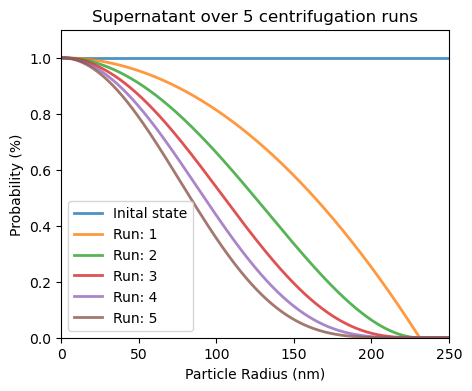

In [51]:
# How does the distribution of the particles over multiple runs change.
runs = 5
count = 1000
size = np.linspace(1,251,count) * 1e-9
rpm = 4000

prob = np.ones(count)
times = 10


fig, ax = plt.subplots(figsize=(5,4))

ax.plot(size*1e9, prob, label=f"Inital state", alpha = 0.8, linewidth=2)

 
for j in range(runs):

    for i in range(count):
        prob[i], pallets = cal_supernate_and_pallets(size[i], prob[i], times,
                                              particle_density, liquid_density, liquid_viscosity,
                                             rpm, arm_length, length)
        
    ax.plot(size*1e9, prob, label=f"Run: {j+ 1}", alpha = 0.8, linewidth=2)

    
ax.set_xlim([0,250])
ax.set_ylim([0,1.1])

ax.set_xlabel("Particle Radius (nm)")
ax.set_ylabel("Probability (%)")
ax.set_title(f"Supernatant over {runs} centrifugation runs")
ax.legend()


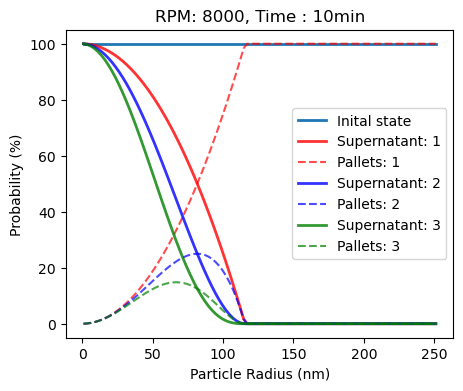

In [37]:
# How does the distribution supernate and pallets of the particles over multiple runs change.
runs = 3
count = 100
size = np.linspace(1,251,count) * 1e-9
rpm = 8000

prob = np.ones(count)
pallets = np.zeros(count)
times = 10


# Define a color cycle for different runs
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(5,4))

ax.plot(size*1e9, prob * 1e2, label=f"Inital state", linewidth=2)

 
for j in range(runs):

    for i in range(count):
        prob[i], pallets[i] = cal_supernate_and_pallets(size[i], prob[i], times,
                                              particle_density, liquid_density, liquid_viscosity,
                                             rpm, arm_length, length)
        
        
    ax.plot(size*1e9, prob * 1e2, label=f"Supernatant: {j +1}", alpha = 0.8, linewidth=2, color=colors[j]) 
    ax.plot(size*1e9, pallets * 1e2, label=f"Pallets: {j + 1}", alpha=0.7, linestyle='--', color=colors[j])

ax.set_xlabel("Particle Radius (nm)")
ax.set_ylabel("Probability (%)")
ax.set_title(f"RPM: {rpm}, Time : {times}min")
ax.legend()
